In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("ltrm_fish_data.csv", low_memory=False)

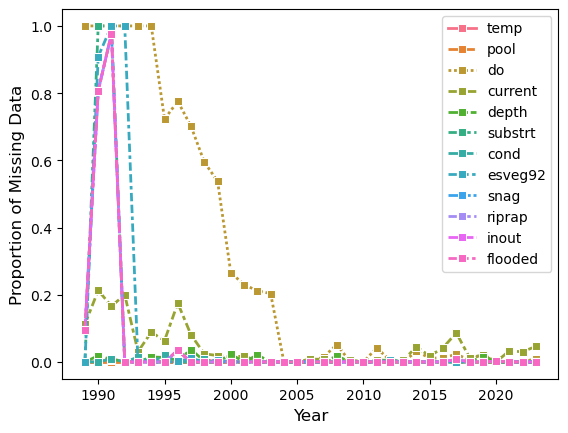

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df[df['fishcode'].notna()].reset_index(drop=True)

df['year'] = pd.to_datetime(df['sdate']).dt.year
yearly_missing_df = df.groupby('year')[['temp', 'pool','do', 'current', 'depth', 'substrt','cond','esveg92', 'snag', 'riprap', 'inout','flooded']].apply(lambda x: x.isna().mean())

fig, ax = plt.subplots(1, 1)
sns.lineplot(
    data = yearly_missing_df,
    ax = ax,
    linewidth = 2,
    marker = 's'
)
ax.set_xlabel("Year", fontsize = 12)
ax.set_ylabel("Proportion of Missing Data", fontsize = 12);

In [4]:
df = df[(df['year'] >= 2004) & (df[['temp', 'pool', 'do', 'current', 'depth', 'substrt','cond','esveg92', 'snag', 'riprap', 'inout','flooded']].isna().sum(axis=1) == 0)].reset_index(drop=True)

In [5]:
df = df.groupby(['utm_e', 'utm_n', 'year', 'period', 'pool']).agg(
    median_temp=('temp', 'median'),
    median_do=('do', 'median'),
    median_current=('current', 'median'),
    median_depth=('depth', 'median'),
    mode_substrt=('substrt', lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0]),
    median_esveg92=('esveg92', 'median'),
    median_cond=('cond', 'median'),
    snag_present=('snag', 'max'),
    riprap_present=('riprap', 'max'),
    inout_present=('inout', 'max'),
    flooded_present=('flooded', 'max'),
    mode_pool=('pool', lambda x: x.mode()[0] if not x.mode().empty else x.iloc[0]),
    fish_codes=('fishcode', lambda x: list(x))
)

unique_fish = set([item for sublist in df['fish_codes'] for item in sublist])
expanded_df = pd.DataFrame({fish: df['fish_codes'].apply(lambda x: fish in x) for fish in unique_fish})
df = pd.concat([df, expanded_df], axis=1)
df.drop(columns = ['fish_codes'], inplace=True)

fish_df = df.drop(columns=['mode_substrt', 'mode_pool','median_esveg92','median_temp', 'median_do', 'median_current','median_depth','median_cond','snag_present','riprap_present','inout_present','flooded_present' ])
df['richness'] = fish_df.sum(axis=1)

pd.set_option('display.max_columns', None)
df.head(5)

,,,,,median_temp,median_do,median_current,median_depth,mode_substrt,median_esveg92,median_cond,snag_present,riprap_present,inout_present,flooded_present,mode_pool,SBSN,CNCF,BKSS,SVCB,SPSK,MNEY,STCT,CMMW,BWFN,YWPH,RKBS,OSSF,SVRH,BGOS,GNSF,U-CY,TFSD,BNBH,GDSN,PRPH,RDSN,CARP,LGPH,MMSN,TPMT,FKMT,SMMW,CNLP,RESF,GSRS,PDFH,PGMW,MGNP,BDKF,CCGF,WRMH,WDSN,GZSD,U-IL,PDSN,U-CN,BTTM,NHSK,SJHR,WTCP,GDFH,STSN,BNDR,BGWM,BDDR,CMSN,SCBC,BSDR,LMBS,BMBF,GSOS,GSBG,SHDR,TTPH,SMBS,GSWM,MQTF,BLCF,WTSK,LESF,RVRH,PSBG,SNGR,GDRH,FHMW,HFCS,WTPH,U-LY,BLGL,SVLP,BKBF,JYDR,MDDR,GSPK,FWDM,YLBH,SVMW,U-CT,SVCP,STGR,BUSK,RVSN,BHCP,BHMW,WTBS,SHRH,ERSN,RVCS,BKCP,PSWM,QLBK,SNSN,YWBS,U-CL,U-PC,CNSN,GSCP,YOYF,WLYE,RRDR,SMBF,SGER,STBS,CLSR,SFSN,NTPK,LNGR,FHCF,GSPS,BKBH,PNSD,BNMW,SBWB,GDEY,richness
utm_e,utm_n,year,period,pool,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
532479,4938958,2014,1,04,24.9,6.9,0.41,1.90,2.0,0.0,573.0,1.0,0.0,1.0,0.0,04,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,15
536879,4935808,2004,1,04,20.6,6.9,0.08,1.60,1.0,2.0,484.0,1.0,0.0,0.0,1.0,04,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,10
536929,4935758,2016,1,04,24.8,6.0,0.02,1.60,2.0,3.0,287.0,1.0,0.0,0.0,1.0,04,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,8
536979,4935758,2023,1,04,28.1,12.8,0.06,0.45,2.0,2.0,507.0,0.0,0.0,0.0,0.0,04,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,

In [6]:
 df['mode_pool'].value_counts()

mode_pool
LG    656
13    461
08    436
04    389
26    335
Name: count, dtype: int64

Text(0, 0.5, 'Density')

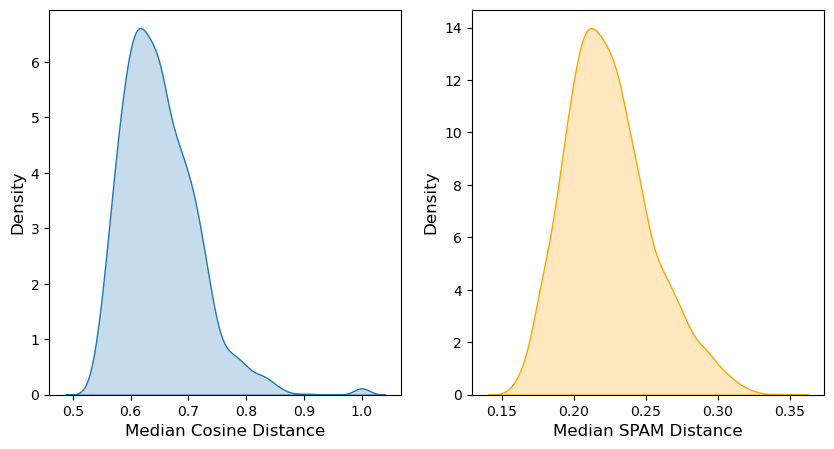

In [7]:
from scipy.spatial.distance import pdist, squareform

def spam_distance(x, y, alpha=2, beta=3):
    a = sum((x == 1) & (y == 1))
    b = sum((x == 0) & (y == 0))
    c = sum((x == 1) & (y == 0))
    d = sum((x == 0) & (y == 1))
    return alpha * (c + d) / (beta*a + b + alpha * (c + d))

dist_matrix_cosine = pdist(1*fish_df, metric='cosine')
dist_matrix_spam = pdist(1*fish_df, metric=spam_distance)

dist_df_cosine = pd.DataFrame(squareform(dist_matrix_cosine))
dist_df_spam = pd.DataFrame(squareform(dist_matrix_spam))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.kdeplot(dist_df_cosine.median(axis=0), clip=(0, None), ax = ax[0], fill=True)
sns.kdeplot(dist_df_spam.median(axis=0), clip=(0, None), ax = ax[1], fill=True, color="orange")
ax[0].set_xlabel("Median Cosine Distance", fontsize = 12)
ax[0].set_ylabel("Density", fontsize = 12)
ax[1].set_xlabel("Median SPAM Distance", fontsize = 12)
ax[1].set_ylabel("Density", fontsize = 12)

In [8]:
fish_cosine_df = fish_df[(dist_df_cosine.median(axis=0) <= 0.85).values].copy()
fish_spam_df = fish_df.copy()

cosine_df = df[(dist_df_cosine.median(axis=0) <= 0.85).values].copy()
spam_df = df.copy()

dist_matrix_cosine = pdist(1*fish_cosine_df, metric='cosine')
dist_matrix_spam = pdist(1*fish_spam_df, metric=spam_distance)

dist_df_cosine = pd.DataFrame(squareform(dist_matrix_cosine))
dist_df_spam = pd.DataFrame(squareform(dist_matrix_spam))

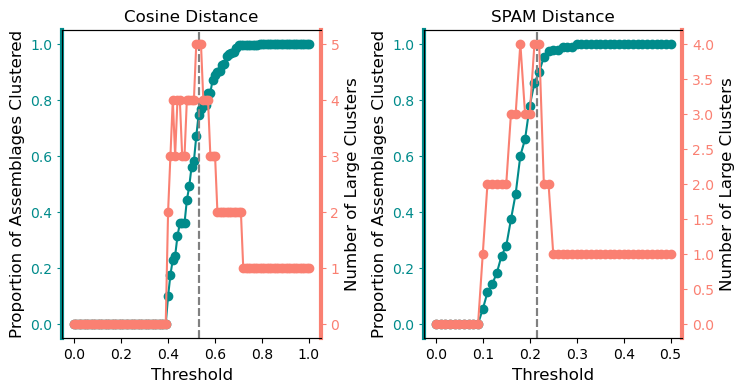

In [9]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster

linked_cosine = linkage(dist_matrix_cosine, method='average')
linked_spam = linkage(dist_matrix_spam, method='average')

fig, ax = plt.subplots(1, 2, figsize=(8, 4))

for n, thresholds in enumerate([np.linspace(0, 1, 101), np.linspace(0, 0.5, 51)]):
    ratio_data_clustered = []
    num_big_clusters = []

    for t in thresholds:
        if n == 0:
            clusters = fcluster(linked_cosine, t, criterion='distance')
        else:
            clusters = fcluster(linked_spam, t, criterion='distance')

        cluster_sizes = np.bincount(clusters)
        large_clusters = cluster_sizes[cluster_sizes >= 100]
        num_big_clusters.append(len(large_clusters))

        if n == 0:
            ratio_data_clustered.append(large_clusters.sum() / len(fish_cosine_df))
        else:
            ratio_data_clustered.append(large_clusters.sum() / len(fish_spam_df))

        #if num_big_clusters[-1] > 4:
        #    print(ratio_data_clustered[-1])
        #    print(t, num_big_clusters[-1])

    ax[n].plot(thresholds, ratio_data_clustered, color='darkcyan', marker='o', linestyle='-')
    ax2 = ax[n].twinx()
    ax2.plot(thresholds, num_big_clusters, color='salmon', marker='o', linestyle='-')

    ax[n].set_xlabel("Threshold", fontsize=12)
    ax[n].set_ylabel("Proportion of Assemblages Clustered", fontsize=12)
    ax[n].spines['left'].set_linewidth(3) 
    ax[n].tick_params(axis='y', labelcolor='darkcyan')
    ax[n].spines['left'].set_edgecolor('darkcyan')
    ax[n].yaxis.set_tick_params(left=True, color='darkcyan') 

    ax2.spines['right'].set_linewidth(3) 
    ax2.tick_params(axis='y', labelcolor='salmon')
    ax2.spines['right'].set_edgecolor('salmon')
    ax2.yaxis.set_tick_params(right=True, color='salmon')
    ax2.set_ylabel("Number of Large Clusters", fontsize=12)

    ax[0].axvline(0.53, color='grey', linestyle='--')
    ax[1].axvline(0.215, color='grey', linestyle='--')

    fig.subplots_adjust(wspace=0.4)
    ax[0].set_title("Cosine Distance")
    ax[1].set_title("SPAM Distance")


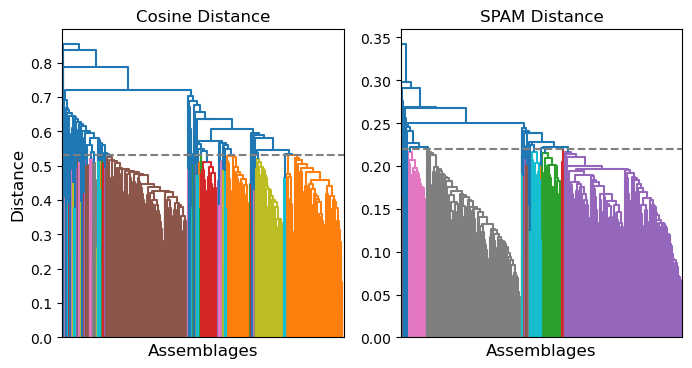

In [10]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram

fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharex=True)
dendrogram(
    linked_cosine,
    color_threshold = 0.53,
    count_sort=True,
    no_labels=True,
    ax=ax[0]
)

dendrogram(
    linked_spam,
    color_threshold = 0.22,
    count_sort=True,
    no_labels=True,
    ax=ax[1]
)

ax[0].axhline(y=0.53, color='grey', linestyle='--')
ax[1].axhline(y=0.22, color='grey', linestyle='--')

ax[0].set_xlabel('Assemblages', fontsize = 12)
ax[1].set_xlabel('Assemblages', fontsize = 12)
ax[0].set_ylabel("Distance", fontsize = 12)

ax[0].set_title("Cosine Distance")
ax[1].set_title("SPAM Distance");

In [11]:
from scipy.cluster.hierarchy import fcluster

# cosine
cosine_cluster_labels = fcluster(linked_cosine, t=0.53, criterion='distance')
cosine_df['cluster'] = cosine_cluster_labels
fish_cosine_df['cluster'] = cosine_cluster_labels

cluster_sizes = cosine_df['cluster'].value_counts()
big_clusters = cluster_sizes[cluster_sizes >= 100].index

mask = cosine_df['cluster'].isin(big_clusters).values
cosine_df = cosine_df[mask].reset_index(drop=True)
fish_cosine_df = fish_cosine_df[mask].reset_index(drop=True)

mapping = dict(zip(big_clusters, range(1, len(big_clusters) + 1)))
cosine_df['cluster'] = cosine_df['cluster'].replace(mapping)
fish_cosine_df['cluster'] = fish_cosine_df['cluster'].replace(mapping)

# spam
spam_cluster_labels = fcluster(linked_spam, t=0.22, criterion='distance')
spam_df['cluster'] = spam_cluster_labels
fish_spam_df['cluster'] = spam_cluster_labels

cluster_sizes = spam_df['cluster'].value_counts()
big_clusters = cluster_sizes[cluster_sizes >= 100].index

mask = spam_df['cluster'].isin(big_clusters).values
spam_df = spam_df[mask].reset_index(drop=True)
fish_spam_df = fish_spam_df[mask].reset_index(drop=True)

mapping = dict(zip(big_clusters, range(1, len(big_clusters) + 1)))
spam_df['cluster'] = spam_df['cluster'].replace(mapping)
fish_spam_df['cluster'] = fish_spam_df['cluster'].replace(mapping)

Text(0.5, 0, 'SPAM Clusters')

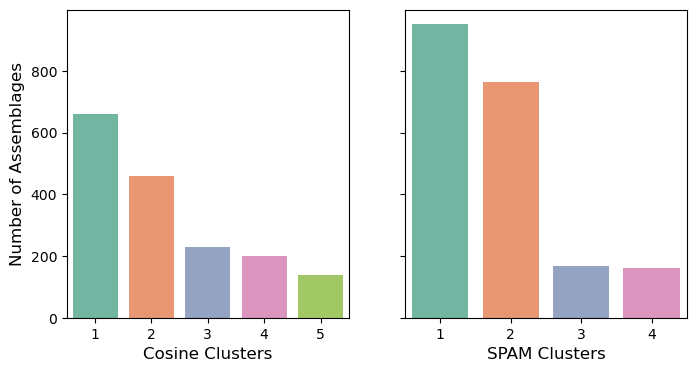

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharey=True)

sns.countplot(x='cluster', data=fish_cosine_df, hue='cluster', palette="Set2", ax=ax[0])
ax[0].legend([], [], frameon=False)  
sns.countplot(x='cluster', data=fish_spam_df, hue='cluster', palette="Set2", ax=ax[1])
ax[1].legend([], [], frameon=False)

ax[0].set_ylabel("Number of Assemblages", fontsize=12)
ax[0].set_xlabel("Cosine Clusters", fontsize=12)
ax[1].set_xlabel("SPAM Clusters", fontsize=12)

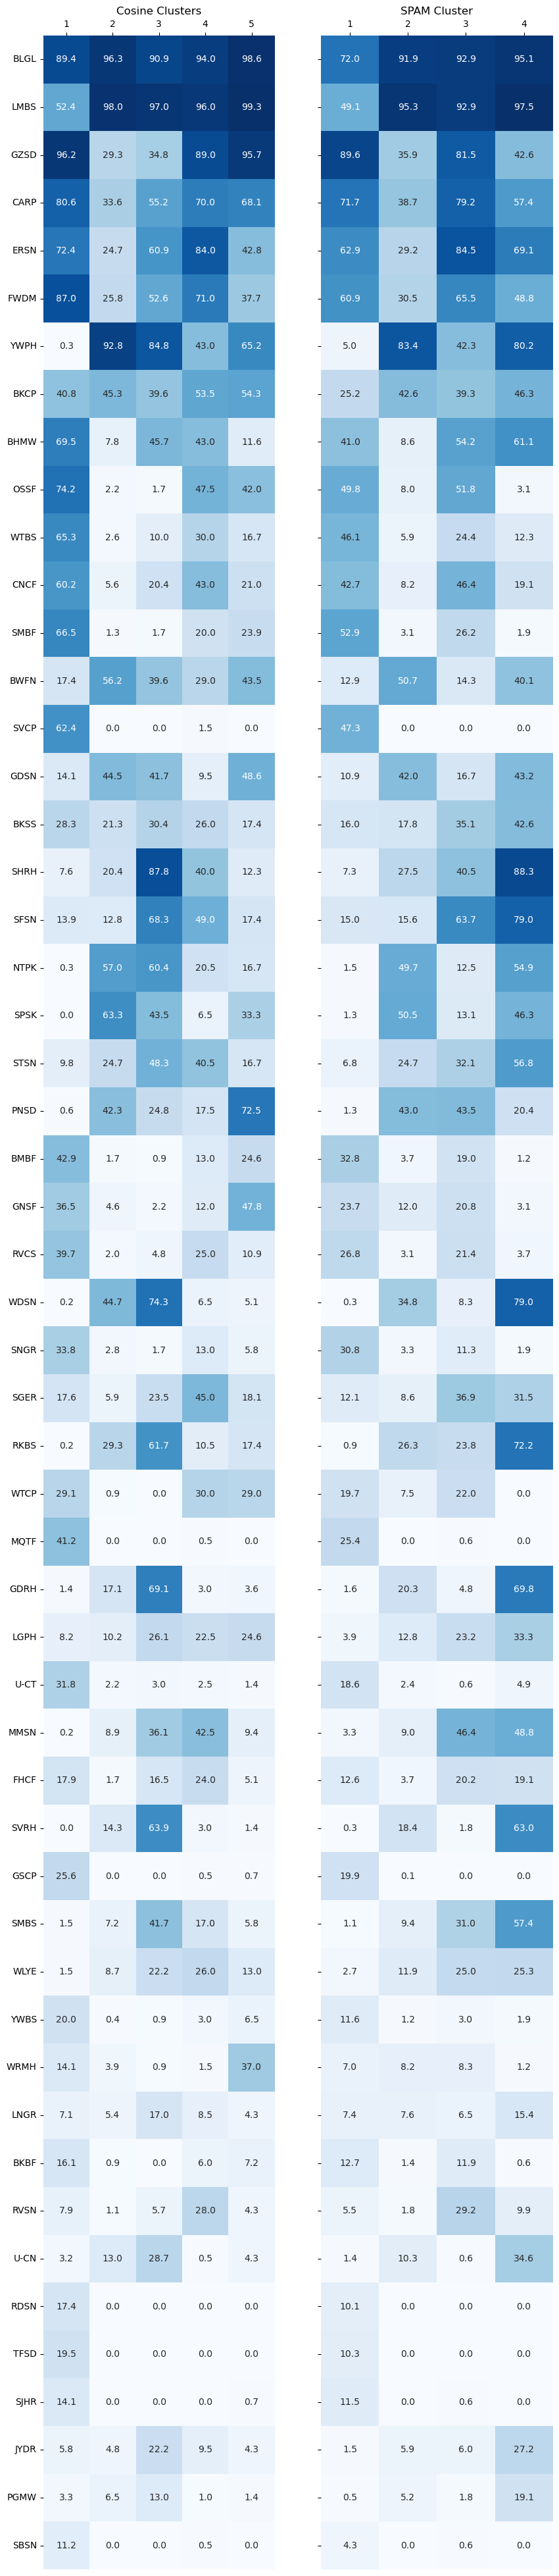

In [13]:
ordering = fish_df.mean().sort_values(ascending=False).index.tolist()
ordering.append('cluster')

cosine_comp  = fish_cosine_df[ordering].groupby('cluster').mean() * 100
spam_comp  = fish_spam_df[ordering].groupby('cluster').mean() * 100

filt = (np.maximum(cosine_comp.max(), spam_comp.max()) > 10).values

cosine_comp = cosine_comp.loc[:, filt]
spam_comp = spam_comp.loc[:, filt]

fig, ax = plt.subplots(1, 2, figsize=(10, 50), sharey=True)
sns.heatmap(cosine_comp.T, cmap='Blues', annot=True, fmt=".1f", ax = ax[0], cbar=False)
sns.heatmap(spam_comp.T, cmap='Blues', annot=True, fmt=".1f", ax = ax[1], cbar=False)
ax[0].tick_params(axis='y', rotation=0)
ax[0].set_title("Cosine Clusters")
ax[1].set_title("SPAM Cluster")
ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[0].xaxis.set_ticks_position('top')
ax[0].xaxis.set_label_position('top')
ax[1].xaxis.set_ticks_position('top')
ax[1].xaxis.set_label_position('top');

In [14]:
final_spam_df = spam_df[['mode_substrt','mode_pool','median_esveg92','median_temp', 'median_do', 'median_current','median_depth','median_cond','snag_present','riprap_present','inout_present','flooded_present','cluster']]
final_spam_df.head()

,mode_substrt,mode_pool,median_esveg92,median_temp,median_do,median_current,median_depth,median_cond,snag_present,riprap_present,inout_present,flooded_present,cluster
0,2.0,04,0.0,24.9,6.9,0.41,1.90,573.0,1.0,0.0,1.0,0.0,4
1,1.0,04,2.0,20.6,6.9,0.08,1.60,484.0,1.0,0.0,0.0,1.0,1
2,2.0,04,3.0,24.8,6.0,0.02,1.60,287.0,1.0,0.0,0.0,1.0,1
3,2.0,04,2.0,28.1,12.8,0.06,0.45,507.0,0.0,0.0,0.0,0.0,2
4,1.0,04,0.0,8.5,11.3,0.00,0.40,462.0,0.0,0.0,0.0,0.0,1


In [15]:
final_spam_df.to_csv('spam_data.csv', index=False)

In [16]:
final_cosine_df = cosine_df[['mode_substrt','mode_pool','median_esveg92','median_temp', 'median_do', 'median_current','median_depth','median_cond','snag_present','riprap_present','inout_present','flooded_present','cluster']]
final_cosine_df.head()

,mode_substrt,mode_pool,median_esveg92,median_temp,median_do,median_current,median_depth,median_cond,snag_present,riprap_present,inout_present,flooded_present,cluster
0,2.0,04,3.0,24.8,6.0,0.02,1.60,287.0,1.0,0.0,0.0,1.0,5
1,2.0,04,2.0,28.1,12.8,0.06,0.45,507.0,0.0,0.0,0.0,0.0,4
2,1.0,04,2.0,25.3,7.2,0.04,0.50,561.0,0.0,0.0,0.0,0.0,4
3,1.0,04,1.0,26.7,5.8,0.02,0.60,327.0,1.0,0.0,1.0,0.0,4
4,2.0,04,1.0,21.7,7.3,0.03,0.90,470.0,0.0,0.0,1.0,0.0,4


In [17]:
final_cosine_df.to_csv('cosine_data.csv', index=False)